<a href="https://colab.research.google.com/github/meghaohm/8318_Project/blob/main/pain_detection_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneGroupOut
from sklearn import svm

In [2]:
from google.colab import files
uploaded = files.upload()

Saving train-80-binary-onehot.csv to train-80-binary-onehot.csv


In [3]:
df = pd.read_csv(io.BytesIO(uploaded['train-80-binary-onehot.csv']))
df = df.dropna()
rows = df.shape[0]
print(rows)
groups = np.array(np.zeros(rows))
for i in range(0, int(rows/100)):
    for j in range(0, 99):
        groups[j] = int(i)

7928


In [ ]:
X = df.iloc[:, 5:47]
y = df.iloc[:, 4]

In [4]:
#LOGO
logo = LeaveOneGroupOut()
X = df.iloc[:, 5:47]
y = df.iloc[:, 4]
logo.get_n_splits(X, y, groups)
logo.get_n_splits(groups=groups)
for train_index, test_index in logo.split(X, y, groups=groups):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    #print("%s %s" % (train_index, test_index))
    #print("X_train:", X_train, "X_test:", X_test, "y_train:", y_train, "y_test:", y_test)

In [5]:
#load the test data set
from google.colab import files
uploaded = files.upload()

Saving test-5-binary-onehot.csv to test-5-binary-onehot.csv


In [6]:
df_test = pd.read_csv(io.BytesIO(uploaded['test-5-binary-onehot.csv']))
df_test = df_test.dropna()
test_input = df_test.iloc[:, 5:47]
test_output = df_test.iloc[:, 4]

In [7]:
#cross entropy
def cross_entropy(predictions, targets, epsilon=1e-12):
    """
    Computes cross entropy between targets (encoded as one-hot vectors)
    and predictions. 
    Input: predictions (N, k) ndarray
           targets (N, k) ndarray        
    Returns: scalar
    """
    predictions = np.clip(predictions, epsilon, 1. - epsilon)
    N = predictions.shape[0]
    ce = -np.sum(targets.T*np.log(predictions+1e-9))/N
    return ce

def one_hot_labels(labels):
    one_hot_labels = np.zeros((labels.size, 5))
    one_hot_labels[np.arange(labels.size),labels.astype(int)] = 1
    return one_hot_labels

In [8]:
print(len(y_train))

7829


In [9]:
#SVM with radial basis function
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)
num_iter = len(y_train)
RBF_y_pred = svclassifier.predict(X_test)
accuracy = accuracy_score(y_test, RBF_y_pred)
print("Validation Accuracy: %.2f%%" % (accuracy * 100.0))
y_test_enc = one_hot_labels(y_test)
cross_output = np.zeros(num_iter)
for i in range(num_iter):
  cross_output[i] = abs(cross_entropy(RBF_y_pred, y_test_enc))
#cross_output = abs(cross_entropy(RBF_y_pred, y_test_enc))
# plot cross_entropy (y-axis) vs iteration (x-axis)
print(len(cross_output))

Validation Accuracy: 79.80%
7829


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- CH25_meanRR
- CH25_rmssd
- CH25_slopeRR
- CH26_A-MAV
- CH26_A-MAVFD
- ...
Feature names seen at fit time, yet now missing:
- CH22_A-MAV
- CH22_A-MAVFD
- CH22_A-MAVFDN
- CH22_A-MAVSD
- CH22_A-MAVSDN
- ...

  warnings.warn(message, FutureWarning)


Test Accuracy: 79.80%


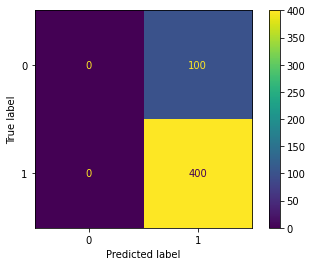

array([[[400,   0],
        [100,   0]],

       [[  0, 100],
        [  0, 400]]])

In [10]:
#use on test set
test_predictions= svclassifier.predict(test_input)
#print(test_predictions)
len(test_predictions)
test_accuracy = accuracy_score(test_output, test_predictions)
print("Test Accuracy: %.2f%%" % (accuracy * 100.0))
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
labels = [0, 1]
cm = confusion_matrix(test_output, test_predictions, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
disp.plot()
plt.show()
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(test_output, test_predictions, labels=labels)

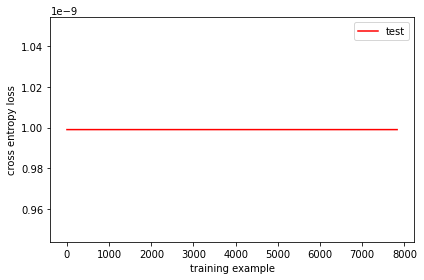

In [23]:
fig, (ax1) = plt.subplots(1, 1)
#ymin, ymax = plt.ylim(0.95, 1.1)
t= np.arange(len(y_train))
ax1.plot(t, cross_output, 'r', label='test')
#ax1.plot(t, cost_dev, 'b', label='dev')
ax1.set_xlabel('training example')
ax1.set_ylabel('cross entropy loss')
ax1.legend(loc='best')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Validation Accuracy: 79.80%
Test Accuracy: 80.00%


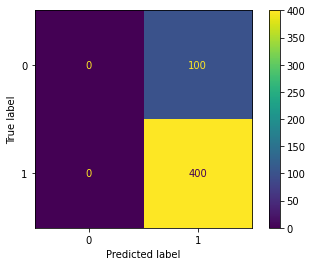

In [12]:
#try for linear SVM
#linear SVC
from sklearn.svm import LinearSVC
SVC_y_pred = LinearSVC(random_state=0).fit(X_test, y_test).predict(X_test)
accuracy = accuracy_score(y_test, SVC_y_pred)
print("Validation Accuracy: %.2f%%" % (accuracy * 100.0))
#loss{‘epsilon_insensitive’, ‘squared_epsilon_insensitive’} meaning L1 and L2 respectively
#use on test set
test_predictions= LinearSVC(random_state=0).fit(test_input, test_output).predict(test_input)
accuracy = accuracy_score(test_output, test_predictions)
print("Test Accuracy: %.2f%%" % (accuracy * 100.0))
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
labels = [0, 1]
cm = confusion_matrix(test_output, test_predictions, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
disp.plot()
plt.show()

In [13]:
#modify the RBF SVM parameters
svclassifier = SVC(kernel='rbf', C=1.0)
svclassifier.fit(X_train, y_train)
RBF_y_pred = svclassifier.predict(X_test)
accuracy = accuracy_score(y_test, RBF_y_pred)
print("Validation Accuracy: %.2f%%" % (accuracy * 100.0))


Validation Accuracy: 79.80%


In [14]:
svclassifier = SVC(kernel='rbf', C=0.1)
svclassifier.fit(X_train, y_train)
RBF_y_pred = svclassifier.predict(X_test)
accuracy = accuracy_score(y_test, RBF_y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 79.80%


In [15]:
svclassifier = SVC(kernel='rbf', C=0.01)
svclassifier.fit(X_train, y_train)
RBF_y_pred = svclassifier.predict(X_test)
accuracy = accuracy_score(y_test, RBF_y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 79.80%


In [16]:
svclassifier = SVC(kernel='rbf', C=0.001)
svclassifier.fit(X_train, y_train)
RBF_y_pred = svclassifier.predict(X_test)
accuracy = accuracy_score(y_test, RBF_y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 79.80%


In [17]:
svclassifier = SVC(kernel='rbf', C=0.0001)
svclassifier.fit(X_train, y_train)
RBF_y_pred = svclassifier.predict(X_test)
accuracy = accuracy_score(y_test, RBF_y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 79.80%


In [18]:
svclassifier = SVC(kernel='rbf', gamma='auto')
svclassifier.fit(X_train, y_train)
RBF_y_pred = svclassifier.predict(X_test)
accuracy = accuracy_score(y_test, RBF_y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 79.80%


Validation Accuracy: 20.20%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- CH25_meanRR
- CH25_rmssd
- CH25_slopeRR
- CH26_A-MAV
- CH26_A-MAVFD
- ...
Feature names seen at fit time, yet now missing:
- CH22_A-MAV
- CH22_A-MAVFD
- CH22_A-MAVFDN
- CH22_A-MAVSD
- CH22_A-MAVSDN
- ...

  warnings.warn(message, FutureWarning)


Test Accuracy: 20.00%


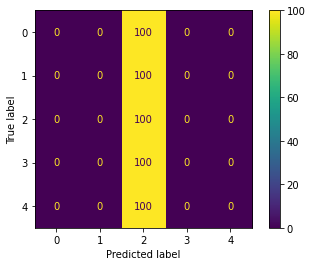

In [19]:
#try multiclass classification
logo = LeaveOneGroupOut()
X = df.iloc[:, 5:47]
y_multi = df.iloc[:, 2]
logo.get_n_splits(X, y, groups)
logo.get_n_splits(groups=groups)
for train_index, test_index in logo.split(X, y_multi, groups=groups):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train_multi, y_test_multi = y_multi.iloc[train_index], y_multi.iloc[test_index]
    #print("%s %s" % (train_index, test_index))
    #print("X_train:", X_train, "X_test:", X_test, "y_train:", y_train, "y_test:", y_test)

df_test_multi = pd.read_csv(io.BytesIO(uploaded['test-5-binary-onehot.csv']))
df_test_multi = df_test_multi.dropna()
test_input_multi = df_test_multi.iloc[:, 5:47]
test_output_multi = df_test_multi.iloc[:, 2]
#train the multiclass model
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train_multi)
RBF_y_pred_multi = svclassifier.predict(X_test)
accuracy = accuracy_score(y_test_multi, RBF_y_pred_multi)
print("Validation Accuracy: %.2f%%" % (accuracy * 100.0))
#use on test data set
multi_test_predictions = svclassifier.predict(test_input_multi)
accuracy = accuracy_score(test_output_multi, multi_test_predictions)
print("Test Accuracy: %.2f%%" % (accuracy * 100.0))
#produce the confusion matrix
labels = [0, 1, 2, 3, 4]
cm = confusion_matrix(test_output_multi, multi_test_predictions, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
disp.plot()
plt.show()

In [130]:
!pip install tpot
from tpot import TPOTClassifier

     |████████████████████████████████| 87 kB 5.4 MB/s 
     |████████████████████████████████| 173.5 MB 10 kB/s 
     |████████████████████████████████| 160 kB 49.3 MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11952 sha256=fef03301ac2712cac53467f3bf9faa643c9d9837cdd216c3634ee870c931218b
  Stored in directory: /root/.cache/pip/wheels/e2/d2/79/eaf81edb391e27c87f51b8ef901ecc85a5363dc96b8b8d71e3
Successfully built stopit
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [20]:
from tpot import TPOTClassifier
pipeline_optimizer = TPOTClassifier(generations=5, population_size=20, cv=5,
                                    random_state=42, verbosity=2)

In [13]:
pipeline_optimizer.fit(X_train, y_train)
pipeline_optimizer.export('tpot_exported_pipeline_binary.py')

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8207057830539366

Generation 2 - Current best internal CV score: 0.8207057830539366

Generation 3 - Current best internal CV score: 0.8208636362504637

Generation 4 - Current best internal CV score: 0.8208636362504637

Generation 5 - Current best internal CV score: 0.8211795916233235

Best pipeline: XGBClassifier(input_matrix, learning_rate=0.01, max_depth=10, min_child_weight=17, n_estimators=100, n_jobs=1, subsample=0.7500000000000001, verbosity=0)


/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:38:37] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 79.80%
Test Accuracy: 79.80%


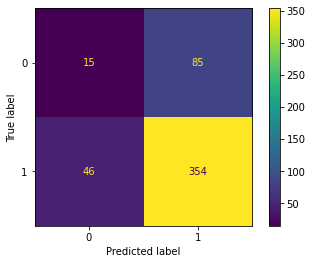

In [21]:
#XGBOOST
#train
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [value for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

#use on test set
test_predictions= model.predict(test_input)
pred = [value for value in test_predictions]
test_accuracy = accuracy_score(test_output, pred)
print("Test Accuracy: %.2f%%" % (accuracy * 100.0))
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
labels = [0, 1]
cm = confusion_matrix(test_output, test_predictions, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
disp.plot()
plt.show()

In [22]:
pipeline_optimizer.fit(X_train, y_train_multi)
pipeline_optimizer.export('tpot_exported_pipeline_binary_multi.py')

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.32316020548476204

Generation 2 - Current best internal CV score: 0.3235430208218574

Generation 3 - Current best internal CV score: 0.32379877508884886

Generation 4 - Current best internal CV score: 0.324820976093423

Generation 5 - Current best internal CV score: 0.324820976093423

Best pipeline: XGBClassifier(MinMaxScaler(input_matrix), learning_rate=0.001, max_depth=7, min_child_weight=17, n_estimators=100, n_jobs=1, subsample=0.7500000000000001, verbosity=0)
